In [12]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
exam_df = pd.read_csv('C:/Users/abhis/Downloads/code/datasets/exams.csv')

exam_df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group A,bachelor's degree,standard,completed,76,90,93
29,female,group D,high school,free/reduced,completed,58,74,77
65,male,group C,associate's degree,free/reduced,none,67,70,67
60,female,group C,bachelor's degree,free/reduced,none,47,71,62
1,female,group C,some college,standard,none,47,52,50


In [18]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [20]:
exam_df = pd.get_dummies(exam_df, columns=['gender',
                                           'race/ethnicity',
                                           'parental level of education',
                                           'lunch',
                                           'test preparation course'])

In [21]:
exam_df.head(5)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,70,76,69,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1
1,47,52,50,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,75,72,68,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,44,52,54,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
4,67,76,80,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0


# Maths score prediction

In [22]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('math score', axis=1)
Y = exam_df['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [24]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.8854143530245824


In [25]:
y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Testing_score :  0.9090104892924251


In [26]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
55,76.868493,84
62,60.620135,64
86,39.869339,39
85,71.552886,72
6,77.442414,82
15,84.557887,85
81,71.077329,70
16,56.396133,55
57,57.689266,48
60,52.871388,47


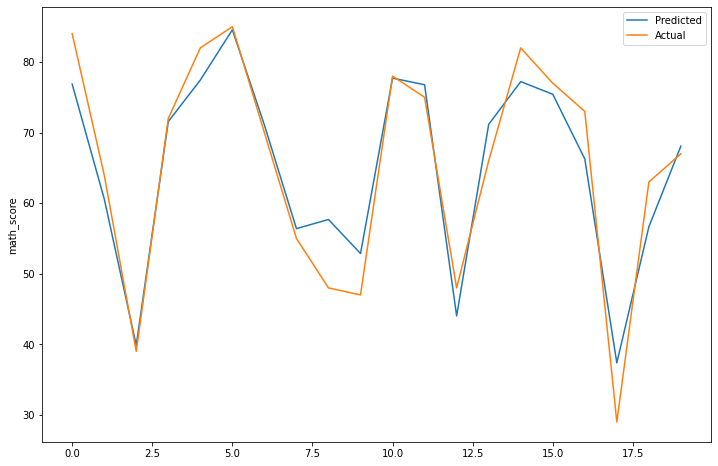

In [27]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('math_score')

plt.legend()
plt.show()

# Reading score predict

In [28]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('reading score', axis=1)
Y = exam_df['reading score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.9296877048096649
Testing_score :  0.8546946512551972


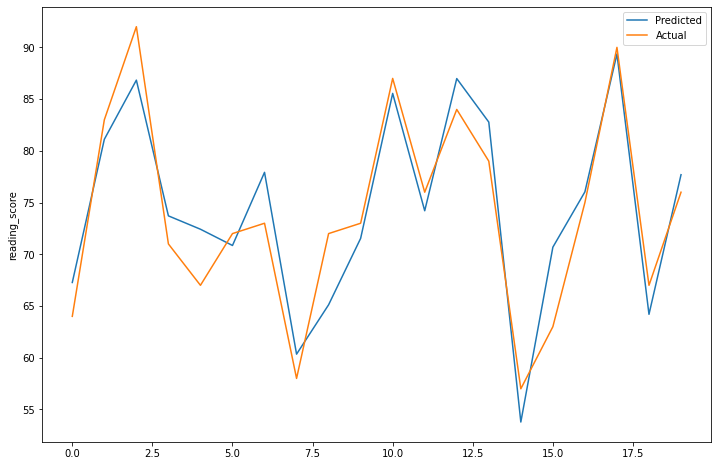

In [30]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('reading_score')

plt.legend()
plt.show()

# Write score

In [31]:
from sklearn.model_selection import train_test_split

X = exam_df.drop('writing score', axis=1)
Y = exam_df['writing score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

print("Training_score : " , linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)
from sklearn.metrics import r2_score

print("Testing_score : ", r2_score(y_test, y_pred))

Training_score :  0.958181926692715
Testing_score :  0.9049073463204117


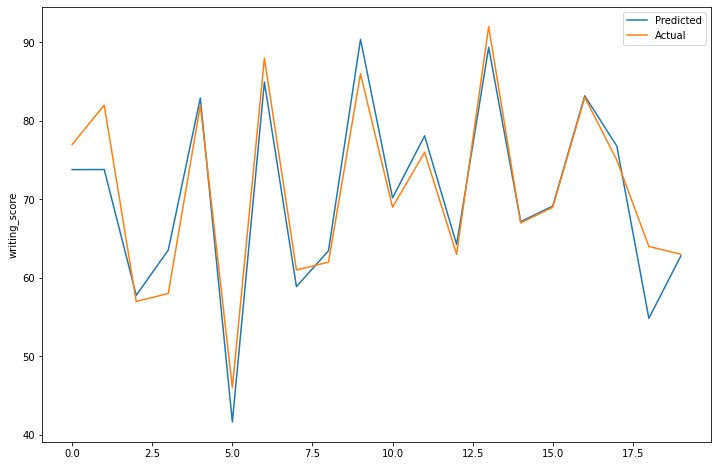

In [33]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('writing_score')

plt.legend()
plt.show()